#### List comprehension: Using a list comprehension, create a new list called "newlist" out of the list "numbers", which contains only the positive numbers from the list, as integers.

In [5]:
numbers = [34.6, -203.4, 44.9, 68.3, -12.2, 44.6, 12.7]

# list comprehension:
# newlist = [<expression> for <element> in <iterable> if <condition>]
newlist = [int(number)  for number in numbers if number > 0]
print(newlist)

[34, 44, 68, 44, 12]


#### List comprehension II: create a list of integers which specify the length of each word in a certain sentence, but only if the word is not the word "the".

In [10]:
# list comprehension:
# newlist = [<expression> for <element> in <iterable> if <condition>]
# len()
sentence = "the quick brown fox jumps over the lazy dog"

len_of_each_word = [len(word) for word in sentence.split(' ') 
                    if word != 'the']

print(len_of_each_word)

[5, 5, 3, 5, 4, 4, 3]


#### xarray & plotting: Load the air temperature data from the xarray tutorial. 

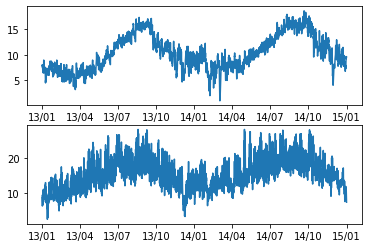

In [17]:
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
airtemps = xr.tutorial.open_dataset("air_temperature")
# Convert to celsius
air = airtemps.air - 273.15
# copy attributes to get nice figure labels and change Kelvin to Celsius
air.attrs = airtemps.air.attrs
air.attrs["units"] = "deg C"
# select one grid box
air1d = air.isel(lat=10, lon=10)
air1d2 = air.isel(lat=15, lon=15)

fig, ax = plt.subplots(2)

ax[0].plot(air1d.time, air1d)
ax[0].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%y/%m'))
ax[1].plot(air1d2.time, air1d2)
ax[1].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%y/%m'))

In [33]:
# looking at the dataset
airtemps = xr.tutorial.open_dataset("air_temperature")
print(airtemps)
for var in airtemps.variables:
    print(var)

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...


#### Select the temperature from index 10 of longitude and three arbitrary latitudes and plot the time series. Hint: parse a list of latitudes to air.isel

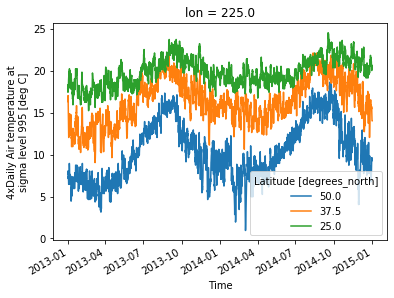

In [69]:
air_temp_list = air.isel(lat=[10, 15, 20], lon=10)
# use internal xarray plotting functions
air_temp_list.plot.line(x='time') 

#### Select the temperature for time step 100 for three different latitudes and and plot it as a function of the longitude

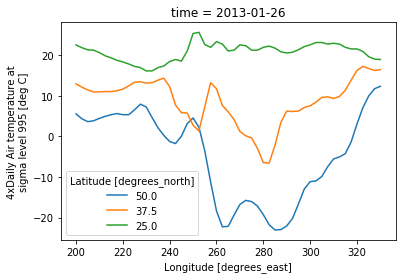

In [68]:
air_temp_list = air.isel(lat=[10, 15, 20], time=100)
# use internal xarray plotting functions
ax = air_temp_list.plot.line(x='lon') 

#### Load the 20180624_leipzig_categorize.nc file and display the model pressure and specific humidity in two subplots

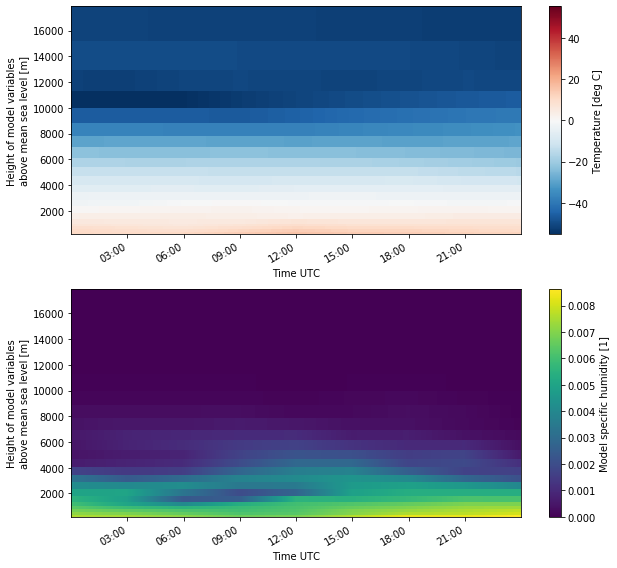

In [88]:
# looking at the dataset
cat_data = xr.open_mfdataset('data/20180624_leipzig_categorize.nc')
    
# transpose temperature data to get time on the x-axis
# convert to deg C
model_temperature = cat_data.temperature.T - 273.15 


# copy attributes to get nice figure labels and change Kelvin to Celsius
model_temperature.attrs = cat_data.temperature.attrs
model_temperature.attrs["units"] = "deg C"

# load and transpose specific humidity
model_spec_hum = cat_data.specific_humidity.T 
model_spec_hum.attrs = cat_data.specific_humidity.attrs

fig, ax = plt.subplots(2, figsize=(12,9))

model_temperature.plot(ax=ax[0])
ax[0].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))

model_spec_hum.plot(ax=ax[1])
ax[1].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))

plt.tight_layout()

#### Load the file 20180624_leipzig_classification.nc and display all the variables.

In [94]:
import Colormaps
from PlottingUtility import load_xy_style, load_cbar_style

#### Try to reproduce the target classification plot 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    title: Classification products from Leipzig
    location: Leipzig
    day: 24
    month: 6
    year: 2018
    history: 27 Jun 2018 07:56:55 - Generated from categorization data by Patric Seifert <seifert@tropos.de>
Categorization history: 27 Jun 2018 07:55:46 - Generated from level 1 data by Ewan O'Connor <e.j.oconnor@reading.ac.uk>
Radar history: Original data has been averaged to 30 seconds.
Lidar history: File converted with convert_pollyxt.m
Model history: 27-Jun-2018 07:52:19: Created from GDAS1 profiles produced with the profile binary in the HYSPLIT offline package using convert_gdas12pro.sh.
Gauge history: created from parsivel2-data by Patric Seifert, TROPOS
Microwave radiometer history: Created from HATPRO data with MWR-PRO V04 Retrieval with offset correction
    source: CloudNet categorization product (software version 0.10.2) comprising:
35.5 GHz Clo

AttributeError: module 'Colormaps' has no attribute 'target_names'